In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pyarrow

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [75]:
df = pd.read_csv("breast_cancer.csv")

In [76]:
# Drop id and Unnamed columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

In [ ]:
# # Drop standard error columns
# df.drop(columns=["radius_se", "texture_se", "perimeter_se", 
#                  "area_se", "smoothness_se", "compactness_se", 
#                  "concavity_se", "concave points_se", "symmetry_se", 
#                  "fractal_dimension_se"], inplace=True)

In [77]:
# Standardize the data (other than diagnosis)
for col in df.columns[1:]:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [78]:
# Encode diagnosis column (M = 1, B = 0, using LabelEncoder)
diagnosis_values = df["diagnosis"].values
le = LabelEncoder()
diagnosis_values = le.fit_transform(diagnosis_values)
df["diagnosis"] = diagnosis_values

In [79]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [80]:
# Split data into features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [81]:
# Resample using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# See the distribution of the classes after SMOTE
y_counts = y_smote.value_counts()
y_counts

diagnosis
1    357
0    357
Name: count, dtype: int64

In [82]:
# Implement 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 30), (143, 30), (571,), (143,))

This marks the end of the preprocessing steps.

In [41]:
# Determining the optimal value of k 
k_bar = 16
k_values = range(1, k_bar + 1)
recalls = dict()

Fitting k=1
Recall: 1.0

Fitting k=2
Recall: 0.9324324324324325

Fitting k=3
Recall: 0.9864864864864865

Fitting k=4
Recall: 0.9594594594594594

Fitting k=5
Recall: 0.972972972972973

Fitting k=6
Recall: 0.9594594594594594

Fitting k=7
Recall: 0.9864864864864865

Fitting k=8
Recall: 0.9864864864864865

Fitting k=9
Recall: 0.9864864864864865

Fitting k=10
Recall: 0.9864864864864865

Fitting k=11
Recall: 0.9864864864864865

Fitting k=12
Recall: 0.972972972972973

Fitting k=13
Recall: 0.972972972972973

Fitting k=14
Recall: 0.972972972972973

Fitting k=15
Recall: 0.972972972972973

Fitting k=16
Recall: 0.972972972972973

Sorted recalls:
k=1: Recall=1.0000
k=3: Recall=0.9865
k=7: Recall=0.9865
k=8: Recall=0.9865
k=9: Recall=0.9865
k=10: Recall=0.9865
k=11: Recall=0.9865
k=5: Recall=0.9730
k=12: Recall=0.9730
k=13: Recall=0.9730
k=14: Recall=0.9730
k=15: Recall=0.9730
k=16: Recall=0.9730
k=4: Recall=0.9595
k=6: Recall=0.9595
k=2: Recall=0.9324


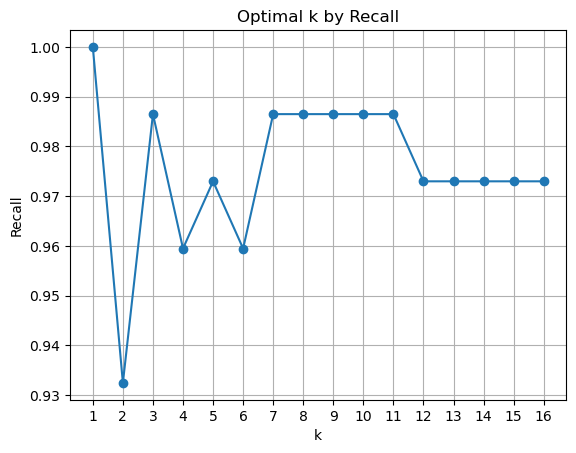

In [43]:
for k in k_values:
    print(f"Fitting k={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    predictor = knn.fit(X_train, y_train) 
    y_pred = predictor.predict(X_test)
    recalls[k] = recall_score(y_test, y_pred)
    print(f"Recall: {recalls[k]}")
    print()

# Find the optimal k
recall_max = max(recalls.values())
k_star = max(recalls, key=recalls.get)
# Plot the recall values
plt.plot(k_values, recalls.values(), marker='o')
plt.title("Optimal k by Recall")
plt.xlabel("k")
plt.ylabel("Recall")
plt.xticks(k_values)
plt.grid()

# Sort the recalls dictionary by recall values
sorted_recalls = sorted(recalls.items(), key=lambda x: x[1], reverse=True)
# Print the sorted recalls
print("Sorted recalls:")
for k, recall in sorted_recalls:
    print(f"k={k}: Recall={recall:.4f}")

Since k=3, 7, 8, and 11 had same recall, try checking precision.

Fitting k=1
Precision: 0.9736842105263158

Fitting k=2
Precision: 0.971830985915493

Fitting k=3
Precision: 0.9605263157894737

Fitting k=4
Precision: 0.9861111111111112

Fitting k=5
Precision: 0.9473684210526315

Fitting k=6
Precision: 0.9726027397260274

Fitting k=7
Precision: 0.9733333333333334

Fitting k=8
Precision: 0.9733333333333334

Fitting k=9
Precision: 0.9733333333333334

Fitting k=10
Precision: 0.9733333333333334

Fitting k=11
Precision: 0.9605263157894737

Fitting k=12
Precision: 0.96

Fitting k=13
Precision: 0.96

Fitting k=14
Precision: 0.972972972972973

Fitting k=15
Precision: 0.972972972972973

Fitting k=16
Precision: 0.972972972972973

Sorted precisions:
k=4: Precision=0.9861
k=1: Precision=0.9737
k=7: Precision=0.9733
k=8: Precision=0.9733
k=9: Precision=0.9733
k=10: Precision=0.9733
k=14: Precision=0.9730
k=15: Precision=0.9730
k=16: Precision=0.9730
k=6: Precision=0.9726
k=2: Precision=0.9718
k=3: Precision=0.9605
k=11: Precision=0.9605
k=12: Precision=0.9600
k=13

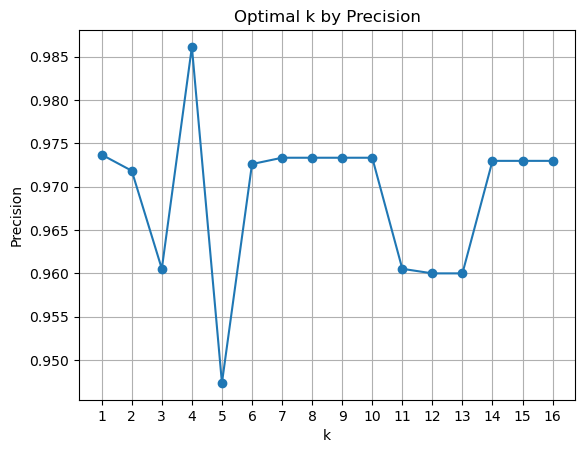

In [44]:
precisions = dict()
for k in k_values:
    print(f"Fitting k={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    predictor = knn.fit(X_train, y_train) 
    y_pred = predictor.predict(X_test)
    precisions[k] = precision_score(y_test, y_pred)
    print(f"Precision: {precisions[k]}")
    print()
    
# Find the optimal k
precision_max = max(precisions.values())
k_star_precision = max(precisions, key=precisions.get)
# Plot the precision values
plt.plot(k_values, precisions.values(), marker='o')
plt.title("Optimal k by Precision")
plt.xlabel("k")
plt.ylabel("Precision")
plt.xticks(k_values)
plt.grid()

# Sort the precisions dictionary by precision values
sorted_precisions = sorted(precisions.items(), key=lambda x: x[1], reverse=True)
# Print the sorted precisions
print("Sorted precisions:")
for k, precision in sorted_precisions:
    print(f"k={k}: Precision={precision:.4f}")

k=7, 8, 9, 10 have the best precision among the ks with a high recall. Now try the f1 score.

Fitting k=1
F1 Score: 0.9866666666666666

Fitting k=2
F1 Score: 0.9517241379310345

Fitting k=3
F1 Score: 0.9733333333333333

Fitting k=4
F1 Score: 0.9726027397260274

Fitting k=5
F1 Score: 0.9599999999999999

Fitting k=6
F1 Score: 0.9659863945578231

Fitting k=7
F1 Score: 0.9798657718120806

Fitting k=8
F1 Score: 0.9798657718120806

Fitting k=9
F1 Score: 0.9798657718120806

Fitting k=10
F1 Score: 0.9798657718120806

Fitting k=11
F1 Score: 0.9733333333333333

Fitting k=12
F1 Score: 0.9664429530201343

Fitting k=13
F1 Score: 0.9664429530201343

Fitting k=14
F1 Score: 0.972972972972973

Fitting k=15
F1 Score: 0.972972972972973

Fitting k=16
F1 Score: 0.972972972972973

Sorted f1 scores:
k=1: F1 Score=0.9867
k=7: F1 Score=0.9799
k=8: F1 Score=0.9799
k=9: F1 Score=0.9799
k=10: F1 Score=0.9799
k=3: F1 Score=0.9733
k=11: F1 Score=0.9733
k=14: F1 Score=0.9730
k=15: F1 Score=0.9730
k=16: F1 Score=0.9730
k=4: F1 Score=0.9726
k=12: F1 Score=0.9664
k=13: F1 Score=0.9664
k=6: F1 Score=0.9660
k=5: 

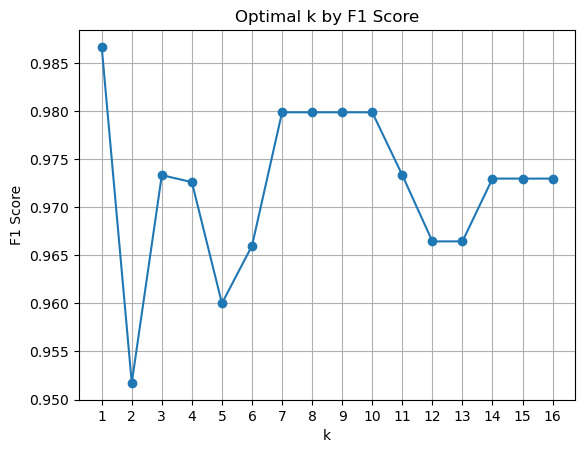

In [45]:
# Plot f1 score
f1_scores = dict()
for k in k_values:
    print(f"Fitting k={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    predictor = knn.fit(X_train, y_train) 
    y_pred = predictor.predict(X_test)
    f1_scores[k] = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1_scores[k]}")
    print()
# Find the optimal k
f1_max = max(f1_scores.values())
k_star_f1 = max(f1_scores, key=f1_scores.get)
# Plot the f1 score values
plt.plot(k_values, f1_scores.values(), marker='o')
plt.title("Optimal k by F1 Score")
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.grid()

# Sort the f1 scores dictionary by f1 score values
sorted_f1_scores = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)
# Print the sorted f1 scores
print("Sorted f1 scores:")
for k, f1 in sorted_f1_scores:
    print(f"k={k}: F1 Score={f1:.4f}")

Our options are still k=7-10. Try accuracy.

Fitting k=1
Accuracy: 0.986013986013986

Fitting k=2
Accuracy: 0.951048951048951

Fitting k=3
Accuracy: 0.972027972027972

Fitting k=4
Accuracy: 0.972027972027972

Fitting k=5
Accuracy: 0.958041958041958

Fitting k=6
Accuracy: 0.965034965034965

Fitting k=7
Accuracy: 0.9790209790209791

Fitting k=8
Accuracy: 0.9790209790209791

Fitting k=9
Accuracy: 0.9790209790209791

Fitting k=10
Accuracy: 0.9790209790209791

Fitting k=11
Accuracy: 0.972027972027972

Fitting k=12
Accuracy: 0.965034965034965

Fitting k=13
Accuracy: 0.965034965034965

Fitting k=14
Accuracy: 0.972027972027972

Fitting k=15
Accuracy: 0.972027972027972

Fitting k=16
Accuracy: 0.972027972027972

Sorted accuracies:
k=1: Accuracy=0.9860
k=7: Accuracy=0.9790
k=8: Accuracy=0.9790
k=9: Accuracy=0.9790
k=10: Accuracy=0.9790
k=3: Accuracy=0.9720
k=4: Accuracy=0.9720
k=11: Accuracy=0.9720
k=14: Accuracy=0.9720
k=15: Accuracy=0.9720
k=16: Accuracy=0.9720
k=6: Accuracy=0.9650
k=12: Accuracy=0.9650
k=13: Accuracy=0.9650
k=5: Accuracy

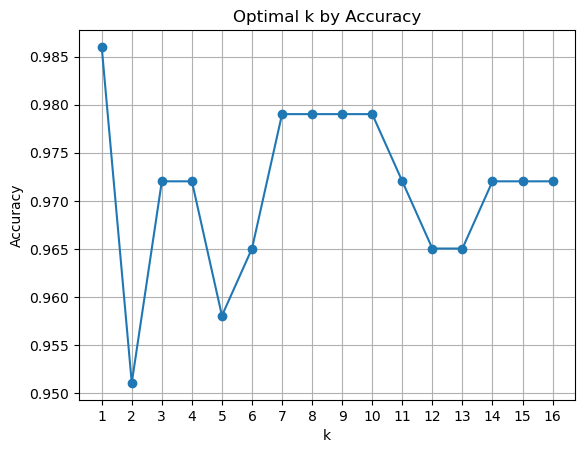

In [46]:
# Plot by accuracy
accuracies = dict()
for k in k_values:
    print(f"Fitting k={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    predictor = knn.fit(X_train, y_train) 
    y_pred = predictor.predict(X_test)
    accuracies[k] = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracies[k]}")
    print()
# Find the optimal k
accuracy_max = max(accuracies.values())
k_star_accuracy = max(accuracies, key=accuracies.get)
# Plot the accuracy values
plt.plot(k_values, accuracies.values(), marker='o')
plt.title("Optimal k by Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()

# Sort the accuracies dictionary by accuracy values
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
# Print the sorted accuracies
print("Sorted accuracies:")
for k, accuracy in sorted_accuracies:
    print(f"k={k}: Accuracy={accuracy:.4f}")


ROC AUC for k=7: 0.995985
ROC AUC for k=8: 0.994810
ROC AUC for k=9: 0.995006
ROC AUC for k=10: 0.995104


<Figure size 1000x600 with 0 Axes>

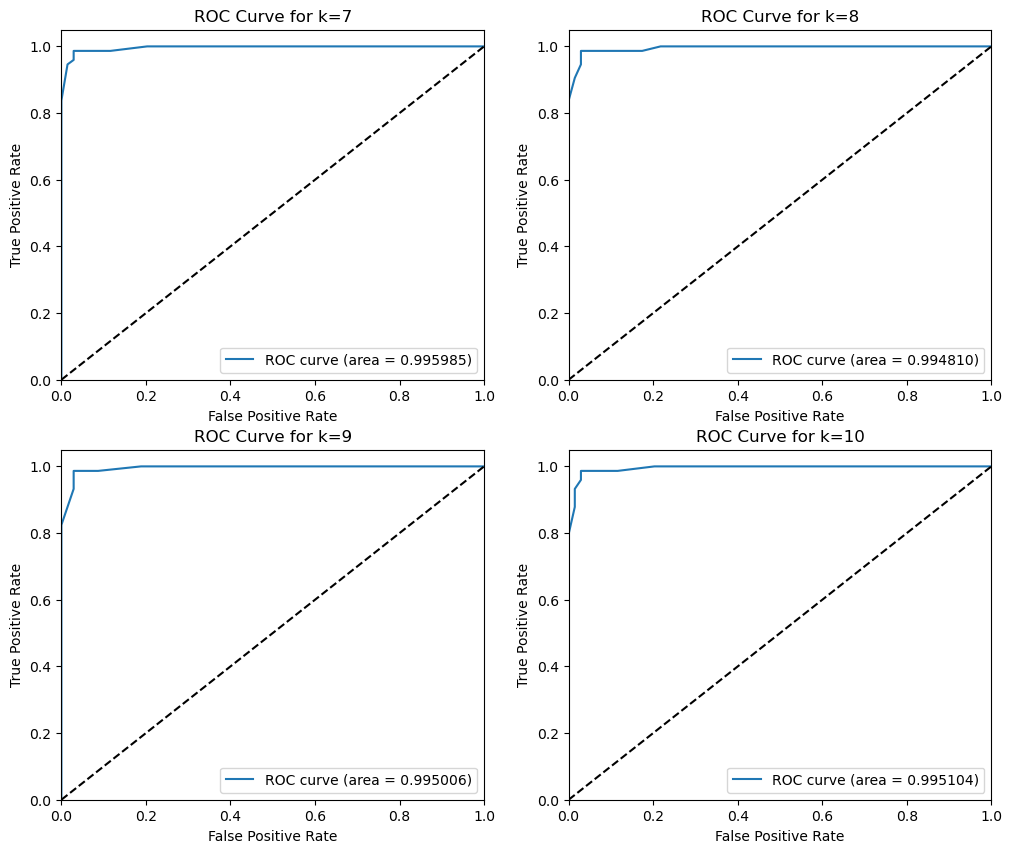

In [49]:
# Plot ROC curve for k=7,8,9,10
best_k_values = [7, 8, 9, 10]
plt.figure(figsize=(10, 6))
# Plot with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, k in enumerate(best_k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC for k={k}: {roc_auc:.6f}")
    
    # Plot ROC curve
    ax = axs[i // 2, i % 2]
    ax.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.6f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for k={k}')
    ax.legend(loc='lower right')



Through the ROC curves, we determine that k=7 is the optimal K.

Now we determine which combination of weight function and algorithm optimizes recall, at k=7.

In [55]:
# Using k=7, determine which combination of weight, neighbors algorithm, and distance metric optimizes performance metrics
k = 7
weight_functions = ['uniform', 'distance']
algorithms = ['ball_tree', 'kd_tree', 'brute']
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
recalls = dict()
precisions = dict()
f1_scores = dict()
accuracies = dict()
aucs = dict()
for weight in weight_functions:
    for algo in algorithms:
        for metric in distance_metrics:
            print(f"Fitting k={k}, weight={weight}, algorithm={algo}, metric={metric}")
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algo)
            predictor = knn.fit(X_train, y_train) 
            y_pred = predictor.predict(X_test)
            print(f"Recall: {recall_score(y_test, y_pred)}")
            print(f"Precision: {precision_score(y_test, y_pred)}")
            print(f"F1 Score: {f1_score(y_test, y_pred)}")
            print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
            y_pred_proba = knn.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            print(f"AUC Score: {auc(fpr, tpr)}")
            
            # Store metrics in dictionaries
            recalls[(weight, algo, metric)] = recall_score(y_test, y_pred)
            precisions[(weight, algo, metric)] = precision_score(y_test, y_pred)
            f1_scores[(weight, algo, metric)] = f1_score(y_test, y_pred)
            accuracies[(weight, algo, metric)] = accuracy_score(y_test, y_pred)
            aucs[(weight, algo, metric)] = auc(fpr, tpr)
            print()

Fitting k=7, weight=uniform, algorithm=ball_tree, metric=euclidean
Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.995985115550333

Fitting k=7, weight=uniform, algorithm=ball_tree, metric=manhattan
Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.995985115550333

Fitting k=7, weight=uniform, algorithm=ball_tree, metric=chebyshev
Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.995985115550333

Fitting k=7, weight=uniform, algorithm=ball_tree, metric=minkowski
Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.995985115550333

Fitting k=7, weight=uniform, algorithm=kd_tree, metric=euclidean
Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
A

In [57]:
# Sort the metrics dictionaries by their values
sorted_recalls = sorted(recalls.items(), key=lambda x: x[1], reverse=True)
sorted_precisions = sorted(precisions.items(), key=lambda x: x[1], reverse=True)
sorted_f1_scores = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
sorted_aucs = sorted(aucs.items(), key=lambda x: x[1], reverse=True)

# Print the sorted metrics
print("Sorted recalls:")
for params, recall in sorted_recalls:
    print(f"Params={params}: Recall={recall:.4f}")

print()
    
print("Sorted precisions:")
for params, precision in sorted_precisions:
    print(f"Params={params}: Precision={precision:.4f}")
    
print()

print("Sorted f1 scores:")
for params, f1 in sorted_f1_scores:
    print(f"Params={params}: F1 Score={f1:.4f}")
    
print()

print("Sorted accuracies:")
for params, accuracy in sorted_accuracies:
    print(f"Params={params}: Accuracy={accuracy:.4f}")
    
print()

print("Sorted AUCs:")
for params, auc in sorted_aucs:
    print(f"Params={params}: AUC={auc:.4f}")

Sorted recalls:
Params=('uniform', 'ball_tree', 'euclidean'): Recall=0.9865
Params=('uniform', 'ball_tree', 'manhattan'): Recall=0.9865
Params=('uniform', 'ball_tree', 'chebyshev'): Recall=0.9865
Params=('uniform', 'ball_tree', 'minkowski'): Recall=0.9865
Params=('uniform', 'kd_tree', 'euclidean'): Recall=0.9865
Params=('uniform', 'kd_tree', 'manhattan'): Recall=0.9865
Params=('uniform', 'kd_tree', 'chebyshev'): Recall=0.9865
Params=('uniform', 'kd_tree', 'minkowski'): Recall=0.9865
Params=('uniform', 'brute', 'euclidean'): Recall=0.9865
Params=('uniform', 'brute', 'manhattan'): Recall=0.9865
Params=('uniform', 'brute', 'chebyshev'): Recall=0.9865
Params=('uniform', 'brute', 'minkowski'): Recall=0.9865
Params=('distance', 'ball_tree', 'euclidean'): Recall=0.9865
Params=('distance', 'ball_tree', 'manhattan'): Recall=0.9865
Params=('distance', 'ball_tree', 'chebyshev'): Recall=0.9865
Params=('distance', 'ball_tree', 'minkowski'): Recall=0.9865
Params=('distance', 'kd_tree', 'euclidean'):

All combinations for the weights, neighbors algorithm, and distance metric led to similar metrics except for AUC. The following combinations of metrics perfomed best:  

- Params=('distance', 'ball_tree', 'euclidean'): AUC=0.9988
- Params=('distance', 'ball_tree', 'manhattan'): AUC=0.9988
- Params=('distance', 'ball_tree', 'chebyshev'): AUC=0.9988
- Params=('distance', 'ball_tree', 'minkowski'): AUC=0.9988
- Params=('distance', 'kd_tree', 'euclidean'): AUC=0.9988
- Params=('distance', 'kd_tree', 'manhattan'): AUC=0.9988
- Params=('distance', 'kd_tree', 'chebyshev'): AUC=0.9988
- Params=('distance', 'kd_tree', 'minkowski'): AUC=0.9988
- Params=('distance', 'brute', 'euclidean'): AUC=0.9988
- Params=('distance', 'brute', 'manhattan'): AUC=0.9988
- Params=('distance', 'brute', 'chebyshev'): AUC=0.9988
- Params=('distance', 'brute', 'minkowski'): AUC=0.9988

In [ ]:
# See attributes of default KNN at k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("KNN Attributes:")
print("Distance Metric:", knn.effective_metric_)


KNN Attributes:
Distance Metric: euclidean
Effective parameters: {}


In [70]:
# For minkowski distance, see the effect of p
a = ('ball_tree', 'minkowski')
b = ('kd_tree', 'minkowski')
c = ('brute', 'minkowski')
p_values = range(1, 11)

recalls = dict()
precisions = dict()
f1_scores = dict()
accuracies = dict()
aucs = dict()
for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm=a[0], metric=a[1], p=p)
    predictor = knn.fit(X_train, y_train) 
    y_pred = predictor.predict(X_test)
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    print(f"AUC Score: {auc_score}")
    
    
    # Store metrics in dictionaries
    recalls[(a[0], a[1], p)] = recall_score(y_test, y_pred)
    precisions[(a[0], a[1], p)] = precision_score(y_test, y_pred)
    f1_scores[(a[0], a[1], p)] = f1_score(y_test, y_pred)
    accuracies[(a[0], a[1], p)] = accuracy_score(y_test, y_pred)
    aucs[(a[0], a[1], p)] = auc(fpr, tpr)
    print()
    
# Sort the metrics dictionaries by their values
sorted_recalls = sorted(recalls.items(), key=lambda x: x[1], reverse=True)
sorted_precisions = sorted(precisions.items(), key=lambda x: x[1], reverse=True)
sorted_f1_scores = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
sorted_aucs = sorted(aucs.items(), key=lambda x: x[1], reverse=True)

# Print the sorted metrics
print("Sorted recalls:")
for params, recall in sorted_recalls:
    print(f"Params={params}: Recall={recall:.4f}")

print()
    
print("Sorted precisions:")
for params, precision in sorted_precisions:
    print(f"Params={params}: Precision={precision:.4f}")
    
print()

print("Sorted f1 scores:")
for params, f1 in sorted_f1_scores:
    print(f"Params={params}: F1 Score={f1:.4f}")
    
print()

print("Sorted accuracies:")
for params, accuracy in sorted_accuracies:
    print(f"Params={params}: Accuracy={accuracy:.4f}")
    
print()

print("Sorted AUCs:")
for params, auc in sorted_aucs:
    print(f"Params={params}: AUC={auc:.4f}")


Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.9984332158245202

Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.9988249118683902

Recall: 1.0
Precision: 0.9487179487179487
F1 Score: 0.9736842105263158
Accuracy: 0.972027972027972
AUC Score: 0.9988249118683902

Recall: 1.0
Precision: 0.9367088607594937
F1 Score: 0.9673202614379084
Accuracy: 0.965034965034965
AUC Score: 0.9970622796709754

Recall: 1.0
Precision: 0.9367088607594937
F1 Score: 0.9673202614379084
Accuracy: 0.965034965034965
AUC Score: 0.9972581276929103

Recall: 0.9864864864864865
Precision: 0.9358974358974359
F1 Score: 0.9605263157894737
Accuracy: 0.958041958041958
AUC Score: 0.9962788875832354

Recall: 0.9864864864864865
Precision: 0.9358974358974359
F1 Score: 0.9605263157894737
Accuracy: 0.958041958041958
AUC Score: 0.9962788875832354

Recall: 0.9864864864864865
P

Based on these results, the best performance overall with the Minkowski metric comes with p=1 or p=2, which are equivalent to using the Manhattan and Euclidean distance metric respectively. 

With these results in mind, we will use the following parameters: 
- n_neighbors: 7
- weights: distance
- metric: Euclidean (default)
- algorithm: 'auto'

Our actual model starts here.

In [83]:
# Fit KNN with n=7, weights=distance, algorithm=auto, metric=euclidean
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score}")


Recall: 0.9864864864864865
Precision: 0.9733333333333334
F1 Score: 0.9798657718120806
Accuracy: 0.9790209790209791
AUC Score: 0.9988249118683902


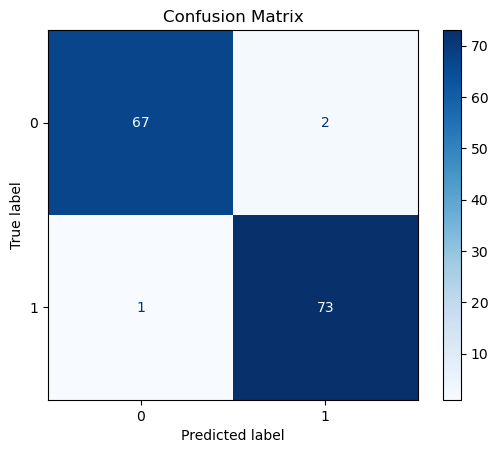

In [84]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()